# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# callbacks based on "race"
b_calls = sum(data[data.race == 'b'].call)
w_calls = sum(data[data.race == 'w'].call)

n_b = len(data[data.race =='b'])
n_w = len(data[data.race =='w'])

n = len(data)

b_percent = b_calls / n_b
w_percent = w_calls / n_w
print("b_calls =",b_calls)
print("w_calls =", w_calls)
print('total sample size =', n)
print("b_percent = %.4f" %b_percent)
print("w_percent = %.4f" %w_percent)

b_calls = 157.0
w_calls = 235.0
total sample size = 4870
b_percent = 0.0645
w_percent = 0.0965


In [5]:
#data.head()
#data.info()

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [6]:
np.random.seed(8080)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

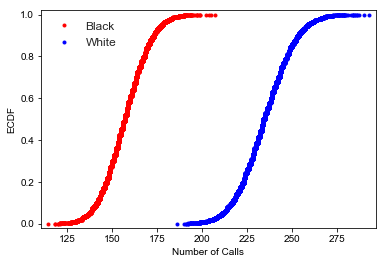

In [7]:
b_samp = np.random.binomial(n_b, b_percent, size=10000)
w_samp = np.random.binomial(n_w, w_percent, size=10000)

b_x, b_y = ecdf(b_samp)
w_x, w_y = ecdf(w_samp)

plt.plot(b_x, b_y, marker='.', linestyle='none', color='red')
plt.plot(w_x, w_y, marker='.', linestyle='none', color='blue')

plt.margins(0.02)

plt.xlabel('Number of Calls')
plt.ylabel('ECDF')
plt.style.use('seaborn')

plt.legend(('Black', 'White'), fontsize='large')

### Q1: What test is appropriate for this problem? Does CLT apply?

A two-sample proportion test is appropriate since the variables are categorial.
CLT does apply for this proportion test. The names were randomly assigned, and the successful sample size for each group is less than 10% of the total size of each group.


Total calls for b_names = 157<br>
Call percent for b_names = 6.45%<br>
Total calls for w_names = 235<br>
Call percent for w_names = 9.65%

Sample size for each group = 2435

### Q2: What are the null and alternate hypotheses?

* **H<sub>0</sub>**: p<sub>b</sub> = p<sub>w</sub>, The number of callbacks for black- and white-sounding names.

* **H<sub>a</sub>**: p<sub>b</sub> $\neq$ p<sub>w</sub>, There is a difference between the number of callbacks for black- and white-sounding names.

### Q3: Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

In [8]:
def ztest_two_samp(r1, n1, r2, n2, one_sided=False):
    """Returns the z-statistic and p-value for a 2-sample Z-test of proportions"""
    p1 = r1/n1
    p2 = r2/n2
    
    p = (r1+r2)/(n1+n2)
    se = np.sqrt(p*(1-p)*(1/n1+1/n2))
    
    z = (p1-p2)/se
    p = 1-stats.norm.cdf(abs(z))
    p *= 2-one_sided
    return z, p

In [10]:
# Frequentist approach
# 95% confidence interval
prop_diff = w_percent - b_percent
print('Observed difference in proportions: \t {}\n'.format(prop_diff))

z_crit = 1.96
p_hat1 = w_percent*(1-w_percent)/n_w
p_hat2 =  b_percent*(1-b_percent)/n_b
ci_high = prop_diff + z_crit*(np.sqrt(p_hat1 + p_hat2))
ci_low = prop_diff - z_crit*(np.sqrt(p_hat1 + p_hat2))

z_stat, p_val = ztest_two_samp(w_calls, n_w, b_calls, n_b)
print('z-stat: \t {}\np-value: \t {}'.format(z_stat, p_val))

print('95% conf int: \t {} - {}'.format(ci_low, ci_high))
moe = (ci_high - ci_low)/2
print('Margin of err: \t +/-{}'.format(moe))

Observed difference in proportions: 	 0.032032854209445585

z-stat: 	 4.108412152434346
p-value: 	 3.983886837577444e-05
95% conf int: 	 0.016777447859559147 - 0.047288260559332024
Margin of err: 	 +/-0.015255406349886438


In [18]:
# Bootstrap approach
# Construct arrays of data: white-sounding names, black-sounding names
all_callbacks = np.array([True] * int(w_calls) + [False] * int(n-w_calls))

size = 10000

bs_reps_diff = np.empty(size)

for i in range(size):
    w_bs_replicates = np.sum(np.random.choice(all_callbacks, size=n_w))
    b_bs_replicates = np.sum(np.random.choice(all_callbacks, size=n_b))
    
    bs_reps_diff[i] = (w_bs_replicates - b_bs_replicates)/n_b
    
bs_p_value = np.sum(bs_reps_diff >= prop_diff) / len(bs_reps_diff)

bs_ci = np.percentile(bs_reps_diff, [2.5, 97.5])
bs_mean_diff = np.mean(bs_reps_diff)

print('obs diff: {}\n'.format(prop_diff))
print('BOOTSTRAP RESULTS\np-value: {}\n95% conf. int.: {}'.format(bs_p_value, bs_ci))

obs diff: 0.032032854209445585

BOOTSTRAP RESULTS
p-value: 0.0
95% conf. int.: [-0.01190965  0.01190965]


Both of the p-values from the frequentist approach and bootstrap method are approximately 0.0000, which is less than the threshold of p = 0.05. This suggests that the null hypothesis should be rejected and supports the alternative hypothesis, which stated that there is a statistically significant difference in the number of call backs between white- and black-sounding names on job applications.

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

### Q4. Write a story describing the statistical significance in the context of the original problem.

Based on the data sample provided, there is a statistically significant difference between the number of callbacks received by white- and black-sounding names for the job applications. In this sample set, the proportion of callbacks for white-sounding names was consistently higher than callbacks for the black-sounding names.

The statistics for the original data set were the following:
Total calls for b_names = 157
Call percent for b_names = 6.45%
Total calls for w_names = 235
Call percent for w_names = 9.65%

The difference between the proportion of callbacks is approximately 49.6% high probability of a callback for the white-sounding names compared to the black-sounding names.

### Q5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

It would be a somewhat crude analysis to assume from this study that the most important factor in callback success is perceived race of the applicant's name. While, the analysis does support the hypothesis that there is a statistical difference between the proportion of callbacks based on white- and black-sounding names, there may have been other factors at play, such as demographic difference in where the applications were went, biases of companies and hiring managers, what consistutes a black- or white-sounding name, and other factors.

While the study mentions that the only difference in applications was the name itself, for further analysis, I would prefer to have a much more thorough explanation of what was selected as white- and black-sounding names.